### Systems Cell Bio 230
### Prof. Gross HW
### 3/21/2019
### Elisabeth Rebboah

## Question 1, Parts A-B

In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import scipy.stats
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [24]:
# Question 1
# Part A (takes very long time to run)
n_runs = 100 # number of runs to simulate
ns = [10, 20, 40, 80, 160, 600, 1000]; # sample sizes
ts = 10000 # ts is the number of time steps in a second
length_dict = defaultdict(list) # Will pull lengths from dataframe of output
len_mean = []
for j in ns: # For each sample size
    for i in range(n_runs): # Generate n_runs trials of sample size ns
        output = pd.DataFrame({'Lengths': [], 'Times': [], 'Velocities': []}) 
        for i in range(j):  # For each individual run of motor across MT
            numtimesteps = 0
            dist = 0 
            MtrDetachDecider = 2 # Bound is true at first, get into while loop
            while MtrDetachDecider != 1: # Check if bound; 99% probability that motor does not detach, while not detached, check to see if can step
                numtimesteps += 1 # Iterate time steps
                MtrStepDecider = random.randrange(100) # Draw random number out of 100 
                if MtrStepDecider == 1:  # Draw 1 out of 1-100, 1:100 chance of stepping 
                    MtrDetachDecider = random.randrange(100) # Draw random number out of 100 again
                    if MtrDetachDecider != 1: # Second probability check, if passes then take a step
                        dist += 1 # Iterate number of steps
                    else:
                        output = output.append({'Lengths': dist*8, 'Times': numtimesteps, 'Velocities':(dist*8)/(numtimesteps/ts)}, ignore_index=True)
        length_dict[j].append(output.Lengths.tolist())
        len_mean.append(scipy.mean(length_dict[j]))
        #print(output)     

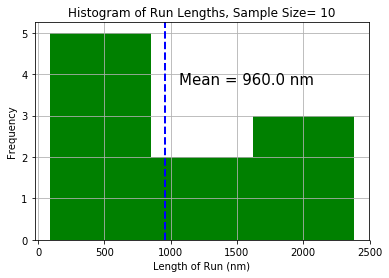

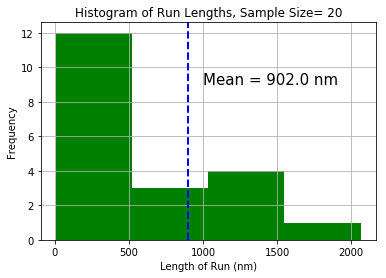

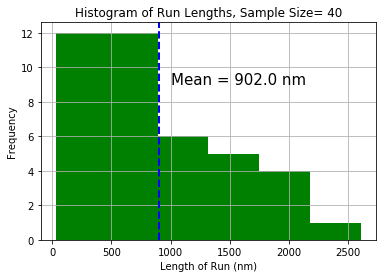

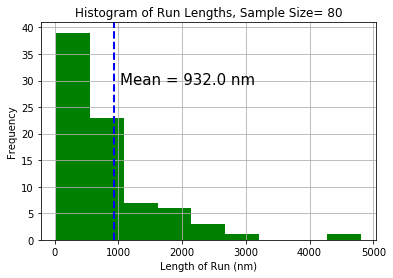

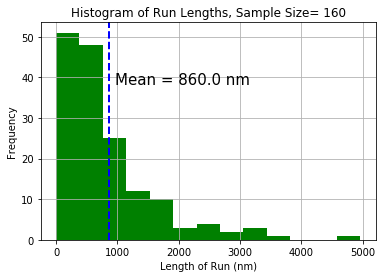

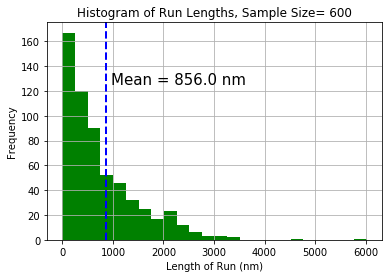

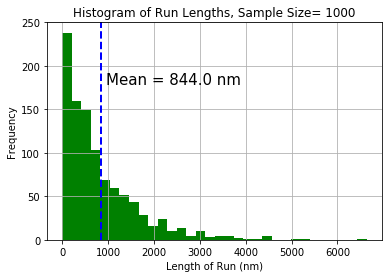

In [25]:
# Part B                  
# Histogram of the data (of first run only)
for i,n in enumerate(ns):
    mylist = length_dict[n][0]
    nbins = round(n**0.5) # Use "square root of number of datapoints" rule
    hist = plt.hist(mylist, nbins, color = 'g')
    plt.xlabel('Length of Run (nm)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Run Lengths, Sample Size= %i' % n)
    plt.axvline(x=len_mean[i],color ='b',linewidth=2, linestyle='dashed')
    plt.text(len_mean[i] + 100., hist[0].max()*0.75, 'Mean = '+ str(round(len_mean[i])) + ' nm', fontsize=15)
    plt.grid(True)
    plt.show()

## Part C

Number of trials: 100
     Runs     Average        SEM         CI  Proportion       pCI
0  10.0    803.200000  24.495644  55.409147  0.04        0.038408
1  20.0    799.480000  17.662439  36.967485  0.04        0.038408
2  40.0    796.080000  13.162104  26.622987  0.18        0.075301
3  80.0    789.890000  9.659790   19.227812  0.25        0.084870
4  160.0   788.342500  6.601042   13.037058  0.39        0.095599
5  600.0   791.640667  3.411542   6.703681   0.89        0.061326
6  1000.0  791.628400  2.427366   4.762492   0.96        0.038408


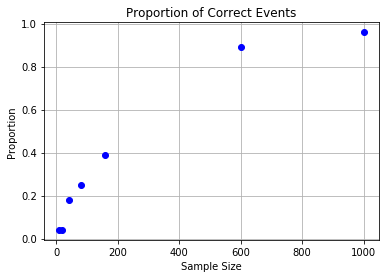

In [26]:
# Part C
# Using results from above 
# Calculations for confidence intervals, fraction of tests that include 800
all_averages = []
correct = 800
allcorr_count = [] 
for i,n in enumerate(ns):
    for k in range(n_runs):
        all_averages.append(scipy.mean(length_dict[n][k]))
        corr_elements = [x for x in length_dict[n][k] if x == correct]
        allcorr_count.append(len(corr_elements)) 
        
averages = [all_averages[x:x+n_runs] for x in range(0, len(all_averages), n_runs)]
corr_counts = [allcorr_count[x:x+n_runs] for x in range(0, len(allcorr_count), n_runs)]

tstar = [2.262, 2.093, 2.0227, 1.9905, 1.975, 1.965, 1.962] # From table
plotcorrect = []
calculations = pd.DataFrame({'Runs': [], 'Average': [], 'SEM': [], 'CI': [], 'Proportion': [], 'pCI': []}) 
for i,n in enumerate(averages):
    final_avg = scipy.mean(averages[i])
    newlist = (np.subtract(averages[i], 800))
    s = (np.sum(newlist*newlist)*(1/(n_runs-1)))**0.5
    sem = s/(n_runs**0.5)
    CI = sem*tstar[i]
    frac_correct = np.count_nonzero(corr_counts[i])/n_runs
    plotcorrect.append(frac_correct)
    pCI = 1.96*((frac_correct*(1-frac_correct)/n_runs)**0.5)
    calculations = calculations.append({'Runs': ns[i], 'Average': final_avg, 'SEM': sem, 'CI': CI, 'Proportion': frac_correct, 'pCI':pCI}, ignore_index=True)

pd.set_option('display.max_colwidth', -1)
print('Number of trials: %i' % n_runs)
print(calculations)
# Plot proportion of correct events as a function of sample size    
plt.plot(ns, plotcorrect, 'bo')
plt.xlabel('Sample Size')
plt.ylabel('Proportion')
plt.title('Proportion of Correct Events')
plt.grid(True)
plt.show()

In [19]:
# Simulation run 10,000 times
n_runs = 1 # n is the number of runs to simulate
ns = [10000]; # sample sizes
ts = 10000 # ts is the number of time steps in a second
length_dict_10000 = defaultdict(list) # Will pull lengths from dataframe of output
len_mean_10000 = []
for j in ns: # For each sample size
    for i in range(n_runs): # Generate n_runs trials of sample size ns
        output = pd.DataFrame({'Lengths': [], 'Times': [], 'Velocities': []}) 
        for i in range(j):  # For each individual run of motor across MT
            numtimesteps = 0
            dist = 0 
            MtrDetachDecider = 2 # Bound is true at first, get into while loop
            while MtrDetachDecider != 1: # Check if bound; 99% probability that motor does not detach, while not detached, check to see if can step
                numtimesteps += 1 # Iterate time steps
                MtrStepDecider = random.randrange(100) # Draw random number out of 100 
                if MtrStepDecider == 1:  # Draw 1 out of 1-100, 1:100 chance of stepping 
                    MtrDetachDecider = random.randrange(100) # Draw random number out of 100 again
                    if MtrDetachDecider != 1: # Second probability check, if passes then take a step
                        dist += 1 # Iterate number of steps
                    else:
                        output = output.append({'Lengths': dist*8, 'Times': numtimesteps, 'Velocities':(dist*8)/(numtimesteps/ts)}, ignore_index=True)
        length_dict_10000[j].append(output.Lengths.tolist())
        len_mean_10000.append(scipy.mean(length_dict_10000[j]))
        print('After 10,000 runs, mean travel is:')
        print(len_mean_10000) 

After 10,000 runs, mean travel is:
[792.5624]


For these conclusions, by hand I determined whether the average length plus or minus the confidence interval includes 800nm, and whether the proportion of correct events plus or minus the proportion confidence interval (pCI) includes 0.95. (It would be much more prudent to determine this by code if there were a larger number of sample sizes.)



| Sample Size   | CI contains 800nm?   | pCI contains 0.95?  |
| ------------- |--------------------- | ------------------  |
| 10            | Yes                  | No                  |
| 20            | Yes                  | No                  |
| 40            | Yes                  | No                  |
| 80            | No                   | No                  |
| 160           | No                   | No                  |
| 600           | No                   | Yes                 |
| 1000          | No                   | Yes                 |


Due to the central limit theorem, the t-test-based confidence interval becomes more accurate as sample size increases for data that has a skewed (non-normal) distribution. In this case, once the sample size reaches around 1000, the proportion of correct over total tests is 0.95.

## Question 2, Parts A-B

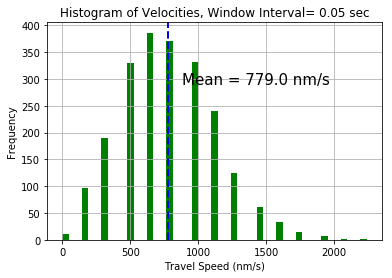

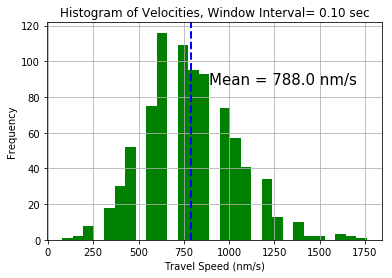

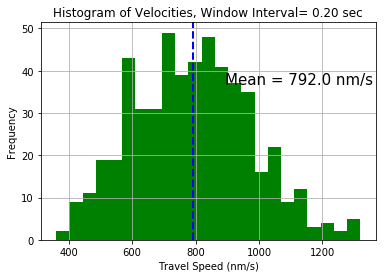

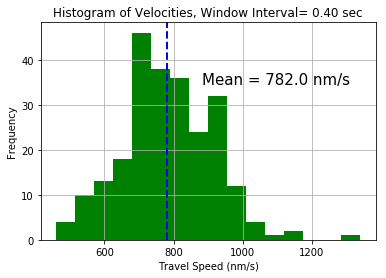

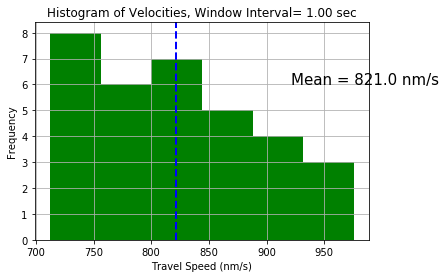

[0.37164925 0.28520286 0.27410208 0.21576763 0.18181818]


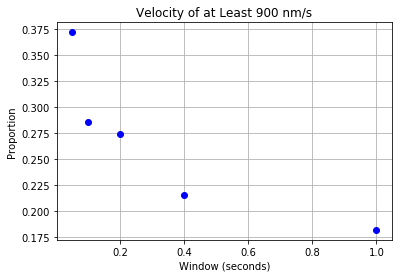

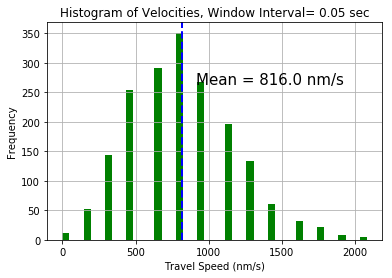

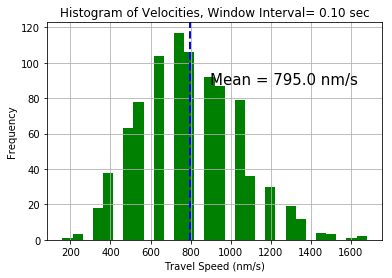

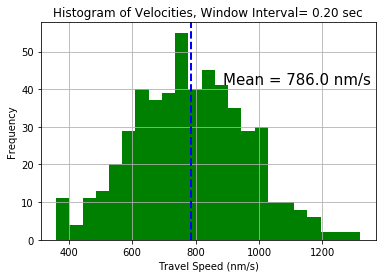

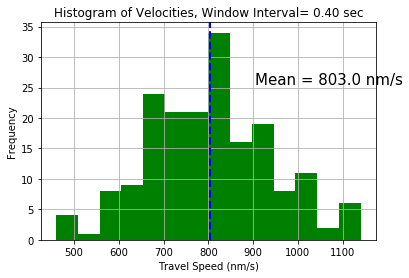

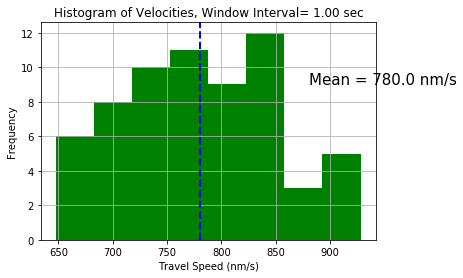

[0.1420765  0.07950728 0.01156069 0.         0.        ]


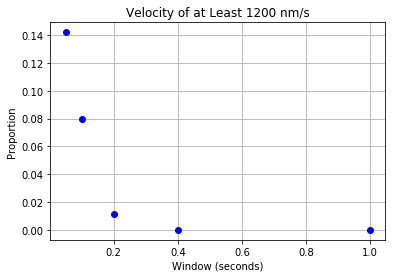

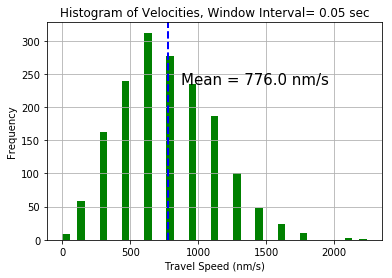

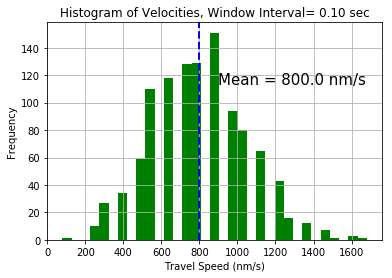

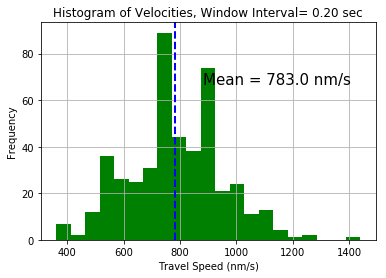

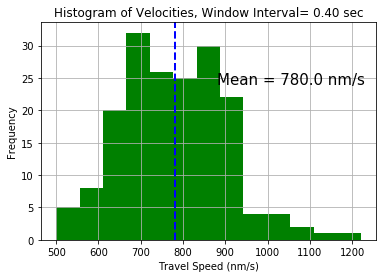

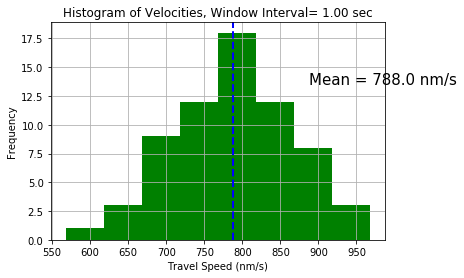

[0.02219556 0.00367309 0.         0.         0.        ]


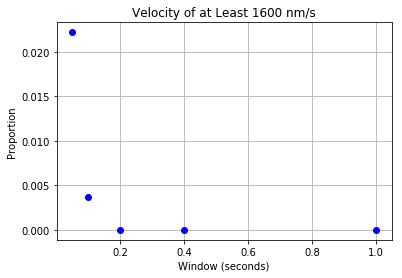

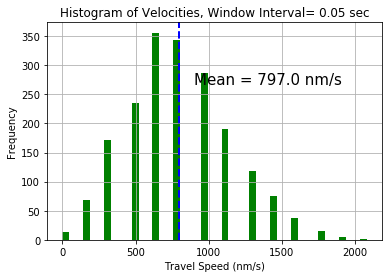

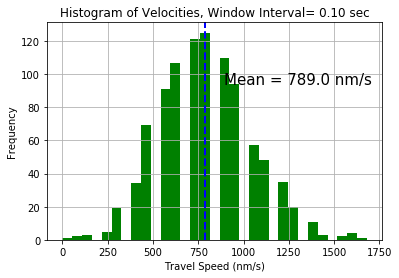

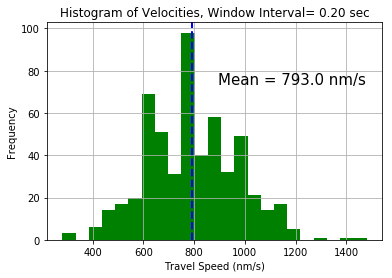

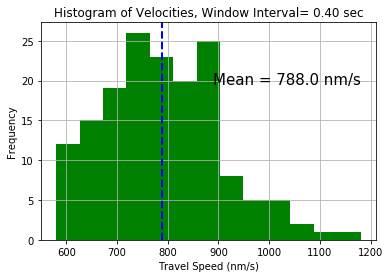

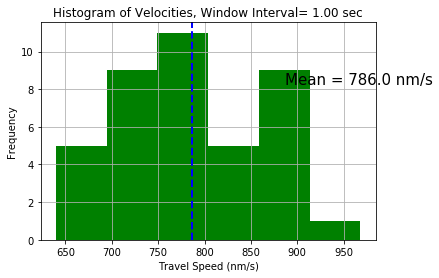

[0. 0. 0. 0. 0.]


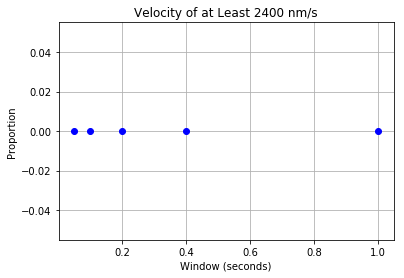

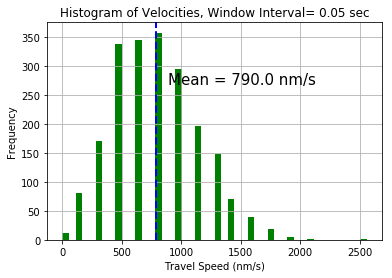

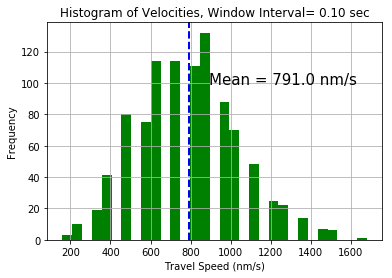

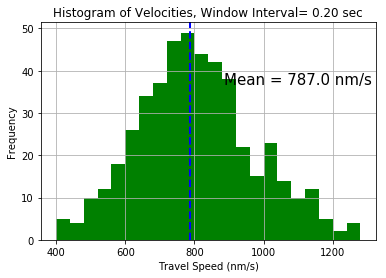

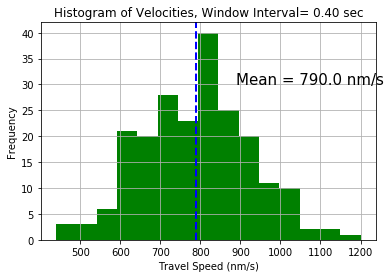

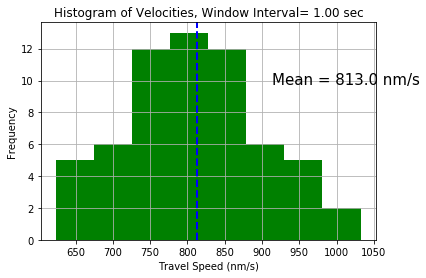

[0. 0. 0. 0. 0.]


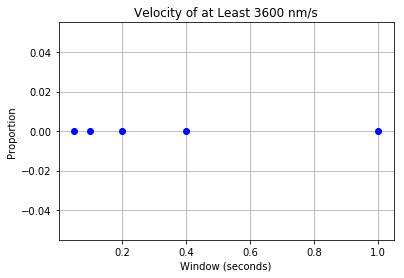

In [6]:
# Question 2
ts = 10000 # ts is the number of time steps in a second
windows = [0.05, 0.1, 0.2, 0.4, 1]
ns = 100
targets = [900, 1200, 1600, 2400, 3600]

for vel in targets:
    prob_list =  []
    for window in windows:
        times_a_window = window*ts
        vel_list = []
        for j in range(ns):
            numtimesteps = 0
            dist = 0
            prev_dist = 0
            MtrDetachDecider = 2 # Bound is true at first, get into while loop
            while MtrDetachDecider != 1: # Check if bound; 99% probabiliy MT does not detach, while not detached, check to see if can step
                MtrStepDecider = random.randrange(100) # Draw random number out of 100 
                numtimesteps += 1
                if MtrStepDecider == 1:  # Draw 1 out of 1-100, 1:100 chance of stepping
                    MtrDetachDecider = random.randrange(100) # Draw random number out of 100 again
                    if MtrDetachDecider != 1: # Second probability check, if passes then take a step
                        dist += 1
                    else:
                        break
                if numtimesteps == times_a_window:
                    velocity = (dist*8-prev_dist)/window
                    prev_dist = dist*8
                    numtimesteps = 0
                    vel_list.append(velocity)
                    
        # Count amount times velocity is at least target velocity
        counts = [i for i in vel_list if i>= vel]
        proportion = len(counts)/len(vel_list)
        prob_list.append(proportion)
        
        # Plot histograms for windows
        nbins = round(len(vel_list)**0.5) # Use "square root of number of datapoints" rule
        hist = plt.hist(vel_list, bins=nbins , color = 'g')
        plt.title('Histogram of Velocities, Window Interval= %1.2f' % window + ' sec')
        plt.xlabel('Travel Speed (nm/s)')
        plt.ylabel('Frequency')
        plt.axvline(x=scipy.mean(vel_list),color ='b',linewidth=2, linestyle='dashed')
        plt.text(scipy.mean(vel_list) + 100., hist[0].max()*0.75, 'Mean = '+ str(round(scipy.mean(vel_list))) + ' nm/s', fontsize=15)
        plt.grid(True)
        plt.show()  
        
    # Plot proportion of velocities at or over target velocity for each window 
    plt.plot(np.array(windows),np.array(prob_list),'bo')
    print(np.array(prob_list))
    plt.title('Velocity of at Least %i' % vel + ' nm/s')
    plt.xlabel('Window (seconds)')
    plt.ylabel('Proportion')
    plt.grid(True)
    plt.show()

Probability of observing specific velocity in given window:

| Window (sec)  | 900 nm/s| 1200 nm/s | 1600 nm/s | 2400 nm/s |  3600 nm/s |
| ------------- |-------- | --------- |---------  |---------  | ---------  |
| 0.05          | 0.344   | 0.111     | 0.027     | 0         | 0          |
| 0.1           | 0.272   | 0.071     |0.003      | 0         | 0          |
| 0.2           | 0.233   | 0.016     | 0         | 0         | 0          |
| 0.4           | 0.183   | 0.004     | 0         | 0         | 0          |
| 1             | 0.033   | 0         | 0         | 0         | 0          |

The velocities for each window were calculated across larger and larger chunks of time, such that there are more datapoints in the smallest window vs. the largest window. Because of this, there is a smaller chance of observing a specific velocity in the larger windows vs. smaller windows. As the target velocity gets higher, the chance of observing it at least once decreases across all windows. I got these answers by looping through the list of velocities for each window and counting the number of times the target velocity is observed, then dividing by the length of the list to get a proportion, which I understand as the chance of observing these velocities.

## Question 3

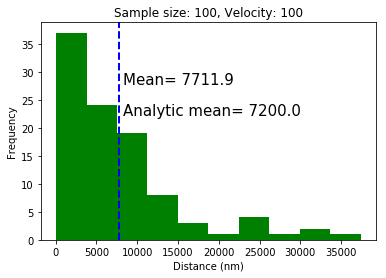

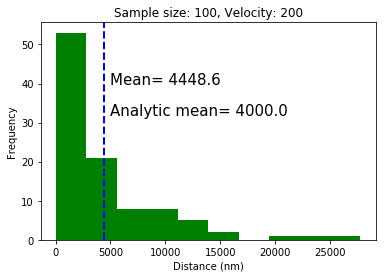

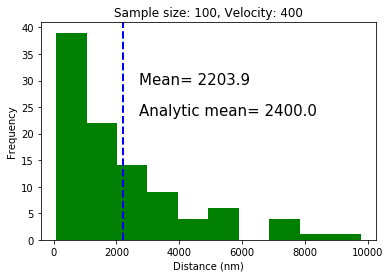

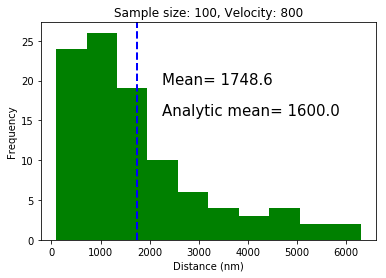

In [28]:
import random
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

ns = 100 # sample size
MtrRebindRate = 0.9998 # chance of rebinding
vel_list = [100, 200, 400, 800] # given velocities, used to calculate analytic soln
MtrStepRateList = [0.99875, 0.9975, 0.995, 0.99] # change in velocity/rate of stepping= change in probability of stepping

for j,n in enumerate(vel_list): # for each velocity
    MtrStepRate= MtrStepRateList[j]
    MtrDetachRate = 0.99 # If a random number between 0 and 1 is greater, is the same as 99% probability that motor does not detach
    distance = []
    for i in range(ns): # for each run in sample size
        dist1 = 0 
        dist2 = 0
        motor1 = 1 # bound is true at first
        motor2 = 1 # bound is true at first
        while motor1 == 1 or motor2 == 1: # while either motor is bound, start run

                # If both motors bound, have the most possibilites
                if motor1 == 1 and motor2 == 1: 
                    Motor1StepDecider = random.random() # random number from (0,1), step decider for motor 1
                    Motor2StepDecider = random.random() # random number from (0,1), step decider for motor 1
                    Motor1DetachDecider = random.random() # random number from (0,1), detach decider for motor 1
                    Motor2DetachDecider = random.random() # random number from (0,1), detach decider for motor 2
                    
                    # Case 1: One or the other can step
                        # Case 1a: First motor can step or fall
                    if Motor2StepDecider < MtrStepRate and Motor1StepDecider > MtrStepRate: 
                        # 2nd detach probability check
                        if Motor1DetachDecider > MtrDetachRate: 
                            motor1 = 0 # falls off
                        else: 
                            dist1 += 1 # steps
                        # Case 1b: Second motor can step or fall
                    if Motor1StepDecider < MtrStepRate and Motor2StepDecider > MtrStepRate: 
                        # 2nd detach probability check
                        if Motor2DetachDecider > MtrDetachRate:
                            motor2 = 0 
                        else: 
                            dist2 += 1 
                    
                    # Case 2: Both can step
                    if Motor1StepDecider > MtrStepRate and Motor2StepDecider > MtrStepRate: 
                        # 2nd detach probability check
                        # Case 2a: First motor falls, second does not
                        if Motor1DetachDecider > MtrDetachRate and Motor2DetachDecider < MtrDetachRate:
                            motor1 = 0  
                        else: 
                            dist2 += 1
                        # Case 2b: Second motor falls, first does not
                        if Motor2DetachDecider > MtrDetachRate and Motor1DetachDecider < MtrDetachRate:
                            motor2 = 0 
                        else: 
                            dist1 += 1
                        # Case 2c: Both fall 
                        if Motor1DetachDecider > MtrDetachRate and Motor2DetachDecider > MtrDetachRate:
                            motor1 = 0
                            motor2 = 0
                            distance.append(max(dist1,dist2)) # End of run
                        # Case 2d: Both step    
                        if Motor1DetachDecider < MtrDetachRate and Motor2DetachDecider < MtrDetachRate:
                            dist1 += 1
                            dist2 += 1
                
                # If motor 1 bound but not motor 2
                if motor1 == 1 and motor2 == 0: 
                    Motor1StepDecider = random.random() # random number from (0,1)
                    Motor1DetachDecider = random.random() # random number from (0,1)
                    Motor2RebindDecider = random.random() # random number from (0,1)
                    # Motor 1 tries to step
                    if Motor1StepDecider > MtrStepRate:
                        # 2nd detach probability check
                        if Motor1DetachDecider > MtrDetachRate:
                            motor1 = 0
                            distance.append(dist1)
                        else:
                            dist1 += 1
                    # Motor 2 tries to rebind
                    if Motor2RebindDecider > MtrRebindRate:
                        motor2 = 1
                        
                # If motor 2 bound but not motor 1
                if motor1 == 0 and motor2 == 1: 
                    Motor2StepDecider = random.random() # random number from (0,1)
                    Motor2DetachDecider = random.random() # random number from (0,1)
                    Motor1RebindDecider = random.random() # random number from (0,1)
                    # Motor 2 tries to step
                    if Motor2StepDecider > MtrStepRate:
                        # 2nd detach probability check
                        if Motor2DetachDecider > MtrDetachRate:
                            motor2 = 0
                            distance.append(dist2)
                        else:
                            dist2 += 1  
                    # Motor 1 tries to rebind
                    if Motor1RebindDecider > MtrRebindRate:
                        motor1 = 1          
 
    pi = 2 # fixed on-rate, 2 per second
    analytic = 800*(1+(pi*800/(2*vel_list[j]))) # calculate analytic solution from Lecture 3 slide #36, Analytic Mean-field theory 
    nbins = round((len(distance))**0.5) # Use "square root of number of datapoints" rule
    hist = plt.hist(np.array(distance)*8, bins=nbins , color = 'g')
    plt.axvline(x=scipy.mean(np.array(distance)*8),color ='b',linewidth=2, linestyle='dashed')
    plt.text(scipy.mean(np.array(distance)*8) + 500., hist[0].max()*0.75, 'Mean= %1.1f' % scipy.mean(np.array(distance)*8), fontsize=15)
    plt.text(scipy.mean(np.array(distance)*8) + 500., hist[0].max()*0.60, 'Analytic mean= %1.1f' % analytic, fontsize=15)
    plt.title('Sample size: %i' % ns + ', Velocity: %i' % vel_list[j])
    plt.xlabel('Distance (nm)')
    plt.ylabel('Frequency')
    plt.show()

Increasing the rate at which each motor steps increases the probability that at least one kinesin motor falls off the microtubule per unit time, therefore decreasing the travel distance. 

The simulation distance mean is similar to the analytic mean, where d = 800, $\pi$ = 2:
\begin{equation*}
D = d(1+\frac{\pi d}{2v})
\end{equation*}

Discrepancies between the two sets of predictions could be due to the stochastic nature of this algorithm, where decisions rely on drawing random numbers.